# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [6]:
riskfactors<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")


In [7]:
library(ggplot2)

In [8]:
riskfactorsDuplicatedIndexes <- rep(row.names(riskfactors), riskfactors$count)

In [9]:
length(riskfactorsDuplicatedIndexes)

[1] 6318638

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [10]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
riskfactorsSampledIndexes <- riskfactorsDuplicatedIndexes[sample(1:length(riskfactorsDuplicatedIndexes), 5000)]

In [11]:
riskfactorsSampled <- riskfactors[riskfactorsSampledIndexes,]

In [12]:
head(riskfactorsSampled,10)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997,2006,8,9,9,9,9,2,9,2,9,0,0,218
986739,2008,7,2,0,9,9,2,0,2,9,0,0,771
845393,2007,5,1,0,9,9,2,0,1,9,0,0,877
996805,2008,8,1,1,1,1,2,0,2,2,0,0,32
481428,2004,3,1,0,9,9,3,0,1,2,0,0,97
169906,2001,6,5,0,9,9,1,1,2,3,0,0,11
333718,2002,10,1,0,9,9,9,0,2,2,0,0,148
537807,2004,6,9,9,9,9,9,9,9,9,9,9,5518
801853,2006,9,9,0,9,1,1,0,2,9,0,0,24
1126577,2009,10,1,9,2,9,2,0,2,2,0,0,1


In [13]:
nrow(riskfactorsSampled)

[1] 5000

In [14]:
unique(riskfactorsSampled$year)

[1] 2006 2008 2007 2004 2001 2002 2009 2000 2003 2005

In [15]:
write.csv(riskfactorsSampled,"./datos/BCSC_risk_factors_summarized_sampled.csv")

In [16]:
riskfactorsSampled<-read.csv("./datos/BCSC_risk_factors_summarized_sampled.csv", sep = ",")

In [17]:
ageVector <- c(27,32,37,42,47,52,57,62,67,72,77,82,87)
riskfactorsSampled$age_group_5_years <- ageVector[as.numeric(riskfactorsSampled$age_group_5_years)]
RaceEthVector <- c("Non-Hispanic white","Non-Hispanic black","Asian/Pacific Islander","Native American","Hispanic","Other/mixed")
riskfactorsSampled$race_eth_name <- factor(RaceEthVector[as.numeric(riskfactorsSampled$race_eth)])

In [35]:
riskfactorsSampledNA <- riskfactorsSampled
riskfactorsSampledNA$bmi_group[riskfactorsSampledNA$bmi_group == 9] <- NA
riskfactorsSampledNA$race_eth[riskfactorsSampledNA$race_eth == 9] <- NA
riskfactorsSampledNA$first_degree_hx[riskfactorsSampledNA$first_degree_hx == 9] <- NA
riskfactorsSampledNA$age_menarche[riskfactorsSampledNA$age_menarche == 9] <- NA
riskfactorsSampledNA$age_first_birth[riskfactorsSampledNA$age_first_birth == 9] <- NA
riskfactorsSampledNA$BIRADS_breast_density[riskfactorsSampledNA$BIRADS_breast_density == 9] <- NA
riskfactorsSampledNA$current_hrt[riskfactorsSampledNA$current_hrt == 9] <- NA
riskfactorsSampledNA$menopaus[riskfactorsSampledNA$menopaus == 9] <- NA
riskfactorsSampledNA$biophx[riskfactorsSampledNA$biophx == 9] <- NA
riskfactorsSampledNA$breast_cancer_history[riskfactorsSampledNA$breast_cancer_history == 9] <- NA

riskfactorsSampledNA$first_degree_hx <- factor(riskfactorsSampledNA$first_degree_hx)
riskfactorsSampledNA$BIRADS_breast_density <- factor(riskfactorsSampledNA$BIRADS_breast_density)

In [19]:
head(riskfactorsSampledNA,10)

X,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,race_eth_name
792997,2006,62,NA,NA,NA,NA,2,NA,2,NA,0,0,218,NA
986739,2008,57,2,0,NA,NA,2,0,2,NA,0,0,771,Non-Hispanic black
845393,2007,47,1,0,NA,NA,2,0,1,NA,0,0,877,Non-Hispanic white
996805,2008,62,1,1,1,1,2,0,2,2,0,0,32,Non-Hispanic white
481428,2004,37,1,0,NA,NA,3,0,1,2,0,0,97,Non-Hispanic white
169906,2001,52,5,0,NA,NA,1,1,2,3,0,0,11,Hispanic
333718,2002,72,1,0,NA,NA,NA,0,2,2,0,0,148,Non-Hispanic white
537807,2004,52,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5518,NA
801853,2006,67,NA,0,NA,1,1,0,2,NA,0,0,24,NA
1126577,2009,72,1,NA,2,NA,2,0,2,2,0,0,1,Non-Hispanic white


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [20]:
summary(riskfactorsSampledNA)

       X                year      age_group_5_years    race_eth    
 Min.   :   1030   Min.   :2000   Min.   :27.00     Min.   :1.000  
 1st Qu.: 260529   1st Qu.:2002   1st Qu.:47.00     1st Qu.:1.000  
 Median : 532766   Median :2004   Median :57.00     Median :1.000  
 Mean   : 544374   Mean   :2004   Mean   :56.62     Mean   :1.614  
 3rd Qu.: 833138   3rd Qu.:2007   3rd Qu.:67.00     3rd Qu.:1.000  
 Max.   :1143326   Max.   :2009   Max.   :87.00     Max.   :6.000  
                                                    NA's   :609    
 first_degree_hx  age_menarche   age_first_birth BIRADS_breast_density
 0   :3774       Min.   :0.000   Min.   :0.000   1   : 297            
 1   : 737       1st Qu.:0.000   1st Qu.:1.000   2   :1665            
 NA's: 489       Median :1.000   Median :2.000   3   :1451            
                 Mean   :1.014   Mean   :2.024   4   : 256            
                 3rd Qu.:2.000   3rd Qu.:3.000   NA's:1331            
                 Max.   :2.000

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [36]:
model <- lm(data=riskfactorsSampledNA, formula= age_group_5_years~year)
summary(model)
riskfactorsSampledNA$predicted_age <- predict(model, riskfactorsSampledNA)
head(riskfactorsSampledNA,1)



Call:
lm(formula = age_group_5_years ~ year, data = riskfactorsSampledNA)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.7211  -9.5803  -0.4929   9.2789  31.3324 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -400.6661   122.0585  -3.283 0.001036 ** 
year           0.2282     0.0609   3.746 0.000181 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.15 on 4998 degrees of freedom
Multiple R-squared:  0.0028,	Adjusted R-squared:  0.002601 
F-statistic: 14.04 on 1 and 4998 DF,  p-value: 0.0001814


X,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,race_eth_name,predicted_age
792997,2006,62,NA,NA,NA,NA,2,NA,2,NA,0,0,218,NA,57.0366


In [37]:
riskfactorsSampledNAOmit_DF <- riskfactorsSampledNA[!is.na(riskfactorsSampledNA$first_degree_hx),]

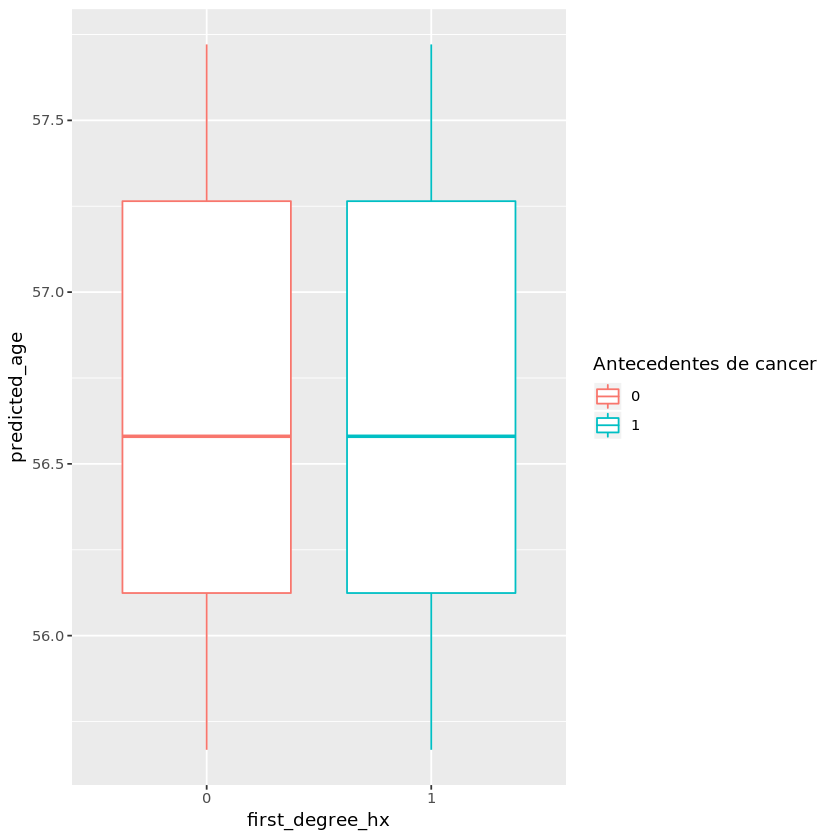

In [23]:
ggplot(data=riskfactorsSampledNAOmit_DF,aes(x=first_degree_hx, y=predicted_age,color=first_degree_hx))+geom_boxplot()+
 scale_color_discrete(name="Antecedentes de cancer")

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

- Usaremos una t-student será un test bilateral
* $H_0$ : La edad de aparicion del cancer no es afectada por antecedentes familiares
* $H_1$ : La edad de aparicion del cancer es afectada por antecedentes familiares

Aviso: No sabemos si es menor o mayor la edad solo sabemos que puede ser afectada o no

In [24]:
# Ejecutar t.test
tw<-t.test(riskfactorsSampledNAOmit_DF$predicted_age[riskfactorsSampledNAOmit_DF$first_degree_hx==1],
           riskfactorsSampledNAOmit_DF$predicted_age[riskfactorsSampledNAOmit_DF$first_degree_hx==0])
tw
d.f.<-tw$parameter
t<-tw$statistic


	Welch Two Sample t-test

data:  riskfactorsSampledNAOmit_DF$predicted_age[riskfactorsSampledNAOmit_DF$first_degree_hx ==  and riskfactorsSampledNAOmit_DF$predicted_age[riskfactorsSampledNAOmit_DF$first_degree_hx ==     1] and     0]
t = 0.7022, df = 1040.8, p-value = 0.4827
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03238549  0.06848136
sample estimates:
mean of x mean of y 
 56.67903  56.66098 


In [25]:
loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)
upth
loth

[1] 1.962246

[1] -1.962246

[1] "El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [ -1.96 , 1.96 ]"

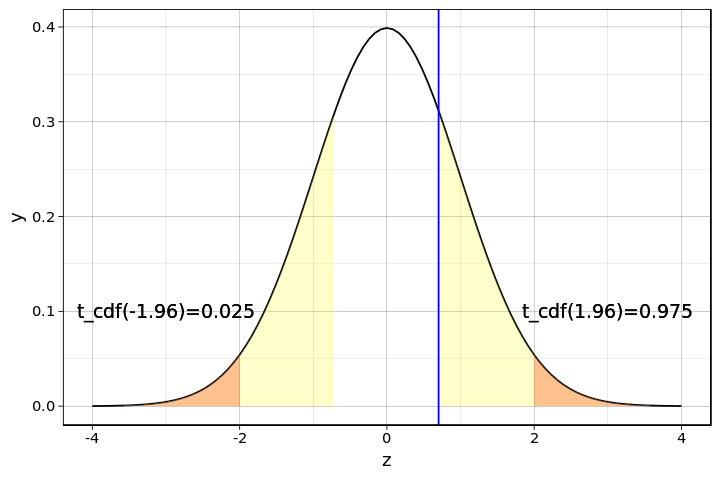

In [26]:
loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)

paste("El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  & x<upth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[x> -abs(t)  & x< abs(t)  ]<-NA
    out
}


options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.2)+
  geom_text(x=3,y=0.1,size=4,label=paste0("t_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("t_cdf(",round(loth,2),")=0.025"))+

  geom_vline(xintercept = t,color="blue")+

  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

- Con este ejemplo no podemos rechazar la hipótesis nula [ -1.97 , 1.97 ], no es estadísticamente significativo, por tanto no podemos asegurar que los antecedentes afecten a la generación de cancer

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

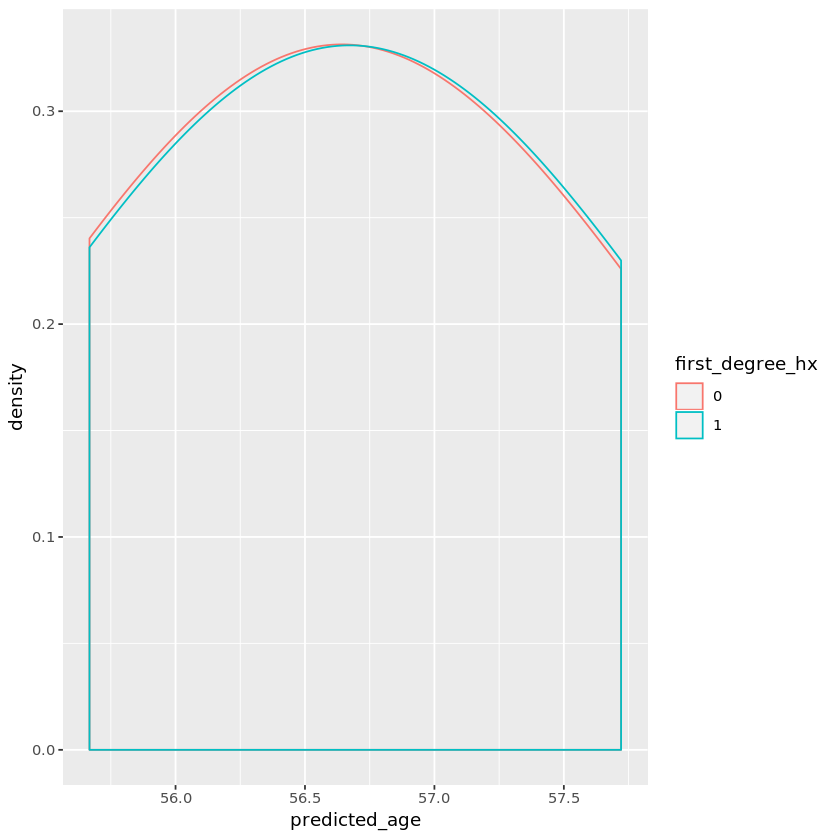

In [27]:
ggplot(data=riskfactorsSampledNAOmit_DF, aes(x=predicted_age,colour=first_degree_hx)) + geom_density(bw=1)

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

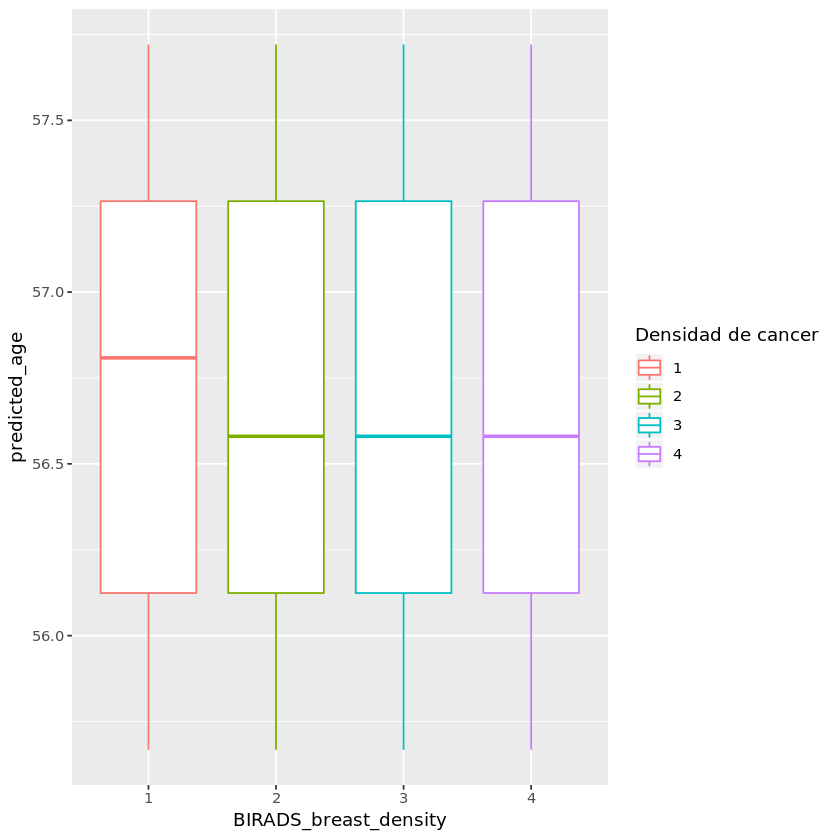

In [38]:
riskfactorsSampledNAOmit_DF <- riskfactorsSampledNA[!is.na(riskfactorsSampledNA$BIRADS_breast_density),]

ggplot(data=riskfactorsSampledNAOmit_DF,aes(x=BIRADS_breast_density, y=predicted_age,color=BIRADS_breast_density))+geom_boxplot()+
 scale_color_discrete(name="Densidad de cancer")

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

- Ya que debemos comparar más de 3 variables utilizaremos un ANOVA

In [29]:
summary(aov( predicted_age ~ BIRADS_breast_density   , data=riskfactorsSampledNAOmit_DF))

                        Df Sum Sq Mean Sq F value Pr(>F)  
BIRADS_breast_density    3    2.8  0.9296   2.142 0.0928 .
Residuals             3665 1590.3  0.4339                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

El p-value es bajo por lo que podemos rechazar la hipótesis nula. Esto significa que no todos los grupos tienen la misma media.

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

- Probariamos con una chi quadrado para ver la homogenidad de la probabilidad de los tipos de cancer

In [42]:
riskfactorsSampledNAOmit_DF_num <- riskfactorsSampledNA
riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density <- as.numeric(as.character(riskfactorsSampledNA$BIRADS_breast_density))
riskfactorsSampledNAOmit_DF_num <- riskfactorsSampledNA[!is.na(riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density),]

In [43]:
summary(riskfactorsSampledNAOmit_DF_num)

       X                year      age_group_5_years    race_eth    
 Min.   :   1030   Min.   :2000   Min.   :27.00     Min.   :1.000  
 1st Qu.: 261148   1st Qu.:2002   1st Qu.:47.00     1st Qu.:1.000  
 Median : 556040   Median :2004   Median :57.00     Median :1.000  
 Mean   : 561242   Mean   :2004   Mean   :56.87     Mean   :1.527  
 3rd Qu.: 861801   3rd Qu.:2007   3rd Qu.:67.00     3rd Qu.:1.000  
 Max.   :1143028   Max.   :2009   Max.   :87.00     Max.   :6.000  
                                                    NA's   :370    
 first_degree_hx  age_menarche   age_first_birth BIRADS_breast_density
 0   :2872       Min.   :0.000   Min.   :0.000   1: 297               
 1   : 578       1st Qu.:0.000   1st Qu.:1.000   2:1665               
 NA's: 219       Median :1.000   Median :2.000   3:1451               
                 Mean   :1.024   Mean   :1.838   4: 256               
                 3rd Qu.:2.000   3rd Qu.:3.000                        
                 Max.   :2.000

In [57]:
riskfactorsSampledNAOmit_DF_num_c <- length(riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density[riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density == 1])
riskfactorsSampledNAOmit_DF_num_c_2 <- length(riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density[riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density == 2])
riskfactorsSampledNAOmit_DF_num_c_3 <- length(riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density[riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density == 3])
riskfactorsSampledNAOmit_DF_num_c_4 <- length(riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density[riskfactorsSampledNAOmit_DF_num$BIRADS_breast_density == 4])

v_risks = c(riskfactorsSampledNAOmit_DF_num_c, riskfactorsSampledNAOmit_DF_num_c_2, riskfactorsSampledNAOmit_DF_num_c_3, riskfactorsSampledNAOmit_DF_num_c_4)
v_risks

[1]  297 1665 1451  256

In [58]:
cqt <- chisq.test(v_risks)
cqt


	Chi-squared test for given probabilities

data:  v_risks
X-squared = 1816.3, df = 3, p-value < 2.2e-16


- El p-valor para aceptar la hipótesis nula es muy bajo, así que no podemos asumir que la $H_0$ y quizás no todos tienen la misma probabilidad

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [66]:
riskfactorsSampledNAOmit_DF_num_t = riskfactorsSampledNAOmit_DF_num_c + riskfactorsSampledNAOmit_DF_num_c_2 + riskfactorsSampledNAOmit_DF_num_c_3 + riskfactorsSampledNAOmit_DF_num_c_4

riskfactorsSampledNAOmit_DF_num_t

[1] 3669

In [67]:


print(paste("El cancer tipo 1 tiene numero de muestras :", riskfactorsSampledNAOmit_DF_num_c))
print(paste("El cancer tipo 1 tiene una proporcion de  :", (riskfactorsSampledNAOmit_DF_num_c / riskfactorsSampledNAOmit_DF_num_t)* 100))

print(paste("El cancer tipo 2 tiene numero de muestras :", riskfactorsSampledNAOmit_DF_num_c_2))
print(paste("El cancer tipo 2 tiene una proporcion de  :", (riskfactorsSampledNAOmit_DF_num_c_2 / riskfactorsSampledNAOmit_DF_num_t)* 100))

print(paste("El cancer tipo 3 tiene numero de muestras :", riskfactorsSampledNAOmit_DF_num_c_3))
print(paste("El cancer tipo 3 tiene una proporcion de  :", (riskfactorsSampledNAOmit_DF_num_c_3 / riskfactorsSampledNAOmit_DF_num_t)* 100))

print(paste("El cancer tipo 4 tiene numero de muestras :", riskfactorsSampledNAOmit_DF_num_c_4))
print(paste("El cancer tipo 4 tiene una proporcion de  :", (riskfactorsSampledNAOmit_DF_num_c_4 / riskfactorsSampledNAOmit_DF_num_t)* 100))


[1] "El cancer tipo 1 tiene numero de muestras : 297"
[1] "El cancer tipo 1 tiene una proporcion de  : 8.09484873262469"
[1] "El cancer tipo 2 tiene numero de muestras : 1665"
[1] "El cancer tipo 2 tiene una proporcion de  : 45.3802125919869"
[1] "El cancer tipo 3 tiene numero de muestras : 1451"
[1] "El cancer tipo 3 tiene una proporcion de  : 39.547560643227"
[1] "El cancer tipo 4 tiene numero de muestras : 256"
[1] "El cancer tipo 4 tiene una proporcion de  : 6.97737803216135"


- El cancer mas comun es el tipo 2 Scattered fibroglandular densities 

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [78]:
modelglm<-glm(data=riskfactorsSampledNAOmit_DF_num_clean,BIRADS_breast_density~first_degree_hx, family=binomial())

cf<-(coef(modelglm))
paste("Los coeficientes son:")
cf

[1] "Los coeficientes son:"

(Intercept) first_degree_hx1 
       2.4747657       -0.2424498

In [79]:
tAntecedentes<-prop.table(table(riskfactorsSampledNAOmit_DF_num_clean[,c("BIRADS_breast_density","first_degree_hx")]),margin = 1)
tAntecedentes

                     first_degree_hx
BIRADS_breast_density         0         1
                    1 0.7992832 0.2007168
                    2 0.8422392 0.1577608
                    3 0.8321114 0.1678886
                    4 0.8085106 0.1914894

- Podemos ver como si que afecta los antecedentes al tipo de cancer

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [82]:
riskfactorsSampledNAOmit_DF_num_clean <- riskfactorsSampledNAOmit_DF_num_clean[!is.na(riskfactorsSampledNAOmit_DF_num_clean$race_eth),]
riskfactorsSampledNAOmit_DF_num_clean$race_eth <- factor(riskfactorsSampledNAOmit_DF_num_clean$race_eth)

In [83]:
summary(riskfactorsSampledNAOmit_DF_num_clean)

       X                year      age_group_5_years race_eth first_degree_hx
 Min.   :   1030   Min.   :2000   Min.   :27.00     1:2473   0:2576         
 1st Qu.: 282137   1st Qu.:2002   1st Qu.:47.00     2: 200   1: 537         
 Median : 565698   Median :2004   Median :57.00     3: 170                  
 Mean   : 574006   Mean   :2004   Mean   :57.02     4:  16                  
 3rd Qu.: 867119   3rd Qu.:2007   3rd Qu.:67.00     5: 217                  
 Max.   :1143028   Max.   :2009   Max.   :87.00     6:  37                  
                                                                            
  age_menarche   age_first_birth BIRADS_breast_density  current_hrt    
 Min.   :0.000   Min.   :0.000   1: 252                Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:1.000   2:1408                1st Qu.:0.0000  
 Median :1.000   Median :2.000   3:1235                Median :0.0000  
 Mean   :1.026   Mean   :1.846   4: 218                Mean   :0.1814  
 3rd Qu.:2.000   3rd Qu.

In [85]:
modelglm<-glm(data=riskfactorsSampledNAOmit_DF_num_clean,BIRADS_breast_density~race_eth, family=binomial())

cf<-(coef(modelglm))
paste("Los coeficientes son:")
cf

[1] "Los coeficientes son:"

(Intercept)   race_eth2   race_eth3   race_eth4   race_eth5   race_eth6 
  2.4469711  -0.1929130   0.3256177   0.2610791  -0.3146071   0.4152298

In [86]:
tAntecedentes<-prop.table(table(riskfactorsSampledNAOmit_DF_num_clean[,c("BIRADS_breast_density","race_eth")]),margin = 1)
tAntecedentes

                     race_eth
BIRADS_breast_density           1           2           3           4
                    1 0.781746032 0.075396825 0.039682540 0.003968254
                    2 0.817471591 0.065340909 0.035511364 0.004971591
                    3 0.776518219 0.065587045 0.067206478 0.004048583
                    4 0.761467890 0.036697248 0.123853211 0.013761468
                     race_eth
BIRADS_breast_density           5           6
                    1 0.091269841 0.007936508
                    2 0.064630682 0.012073864
                    3 0.074493927 0.012145749
                    4 0.050458716 0.013761468

In [88]:
anova(modelglm,test="Chi")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,3112,1750.039,NA
race_eth,5,3.949868,3107,1746.089,0.5566561


- Podemos ver como la raza de tipo 1 non-hispanic white esta muy influenciado a tener el cancer de tipo 1, por todos los demas tipos de cancer con los tipos de etnias vemos como estan bastante distribuidos

In [91]:
riskfactorsSampledNAOmit_DF_num_clean$race_eth  <- factor(riskfactorsSampledNAOmit_DF_num_clean$race_eth)
riskfactorsSampledNAOmit_DF_num_clean$BIRADS_breast_density  <- factor(riskfactorsSampledNAOmit_DF_num_clean$BIRADS_breast_density)
summary(riskfactorsSampledNAOmit_DF_num_clean)

       X                year      age_group_5_years race_eth first_degree_hx
 Min.   :   1030   Min.   :2000   Min.   :27.00     1:2473   0:2576         
 1st Qu.: 282137   1st Qu.:2002   1st Qu.:47.00     2: 200   1: 537         
 Median : 565698   Median :2004   Median :57.00     3: 170                  
 Mean   : 574006   Mean   :2004   Mean   :57.02     4:  16                  
 3rd Qu.: 867119   3rd Qu.:2007   3rd Qu.:67.00     5: 217                  
 Max.   :1143028   Max.   :2009   Max.   :87.00     6:  37                  
                                                                            
  age_menarche   age_first_birth BIRADS_breast_density  current_hrt    
 Min.   :0.000   Min.   :0.000   1: 252                Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:1.000   2:1408                1st Qu.:0.0000  
 Median :1.000   Median :2.000   3:1235                Median :0.0000  
 Mean   :1.026   Mean   :1.846   4: 218                Mean   :0.1814  
 3rd Qu.:2.000   3rd Qu.

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [105]:
c(tAntecedentes[4,1]*0.025, tAntecedentes[4,1]* 0.975)

[1] 0.0190367 0.7424312